In [1]:
# coding: utf-8
###data
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
base_x, base_y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=0, center_box=(1, 20))
#随机生成3类数据
base_n = len(base_y)
base_y=base_y.reshape((base_n,1))

#normalization 
base_x-=base_x.min()
base_x/=base_x.max()

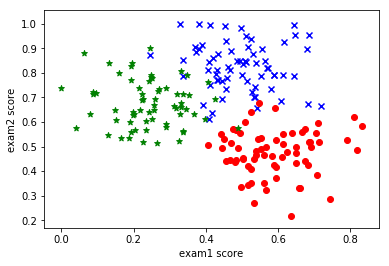

In [2]:
import matplotlib.pyplot as plt

def plotData(x,y):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    x1 = np.where(y[:,0]==0) #y为类似矩阵形式，所以要再取第一列
    x2 = np.where(y[:,0]==1)
    x3 = np.where(y[:,0]==2)
    ax1 = plt.scatter(x[x1,0], x[x1,1], marker = 'x', color = 'b')  
    ax2 = plt.scatter(x[x2,0], x[x2,1], marker = 'o', color = 'r')  
    ax3 = plt.scatter(x[x3,0], x[x3,1], marker = '*', color = 'g') 
    plt.xlabel('exam1 score') 
    plt.ylabel('exam2 score')
    
    plt.show()

plotData(base_x,base_y)

前面的y是为了画图和直观的验证，后面一律只用x

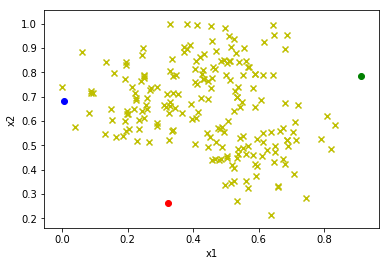

In [3]:
#随机选取k个质心点
k = 3
mid_x = np.random.random_sample([k,2]) #六位数，依次对应中心点的坐标

def plotDataMid(x,mid):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    ax1 = plt.scatter(x[:,0], x[:,1], marker = 'x', color = 'y')  
    
    ax2 = plt.scatter(mid[0,0], mid[0,1], marker = 'o', color = 'r')  
    ax3 = plt.scatter(mid[1,0], mid[1,1], marker = 'o', color = 'b') 
    ax4 = plt.scatter(mid[2,0], mid[2,1], marker = 'o', color = 'g') 

    plt.xlabel('x1') 
    plt.ylabel('x2')
    
    plt.show()

plotDataMid(base_x,mid_x)

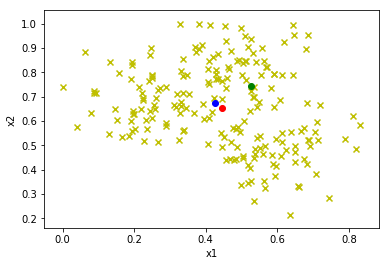

d:\a\software\python3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
d:\a\software\python3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


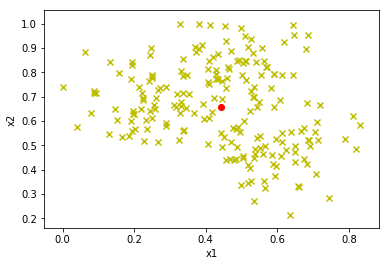

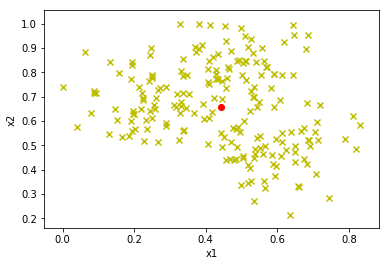

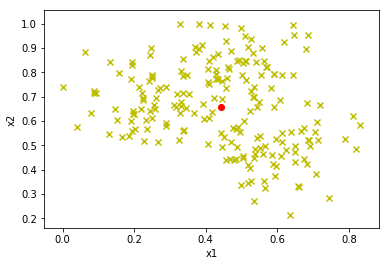

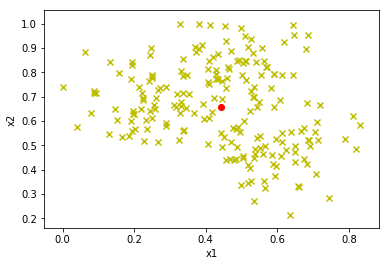

[[        nan         nan]
 [ 0.44267562  0.658622  ]
 [        nan         nan]]


In [4]:
def train(x,mid_x,k):
    #计算每个点的类别
    c = [[] for i in range(k)] #分别对应三类
    for i in range(len(x)):
        mid_x[:,0]=np.power((mid_x[:,0]-x[i][0]),2)
        mid_x[:,1]=np.power((mid_x[:,1]-x[i][1]),2)
        dist = np.sum(mid_x,axis=1)
        c_i = np.argmin(dist)
        c[c_i].append(x[i])
    #重新计算中心点
    for i in range(k):
        mid_x[i,:] = np.mean(c[i],axis = 0)
        #print(mid_x)
    return mid_x

iterations = 100
for j in range(iterations):
    mid_x=train(base_x,mid_x,k)
    #print(mid_x)
    if j%20 == 0:
        plotDataMid(base_x,mid_x)
print(mid_x)